In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [4]:
def sample_gen(n ) :
    arr = []
    for j in range(n) :
        arr.append([np.random.normal(0,1.0) , np.random.normal(0,1.0)])
    return np.array(arr).T
def get_corr_sample(sample , rho) :
    alpha = (np.sqrt(1+rho) + np.sqrt(1-rho))/2
    beta = (np.sqrt(1+rho) - np.sqrt(1-rho))/2
    A_rho = [[alpha , beta],[beta , alpha]]
    return A_rho@sample
def E(X) :
    return np.sum(X,axis=1)/len(X[0])
def T(X) :
    return np.sum(X[0]*X[1])/len(X[0])
def prob(x, mean, std_dev):
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * (std_dev ** 2))
    pdf = coefficient * np.exp(exponent)
    return pdf 
# T(np.array([[1,2,3],[4,5,6]]))
# E(np.array([[1,2,3],[4,5,6]]))

### Проверим , что критичесая область это |T(x)|>20/n (Для достижения alpha < 0.05)

In [46]:
n = 100
count_reject = []
num_samples = 10000
for j in range(num_samples) :
    sample = sample_gen(n)
    count_reject.append(np.abs(T(sample)) > 20/n)
print("alpha =" ,sum(count_reject)/num_samples , " < 0.05 , как и ожидалось") 

alpha = 0.0461  < 0.05 , как и ожидалось


### Найдем мощность от rho

[0.01 0.08 0.15 0.22 0.29 0.36 0.43 0.5  0.57 0.64 0.71 0.78 0.85 0.92
 0.99]


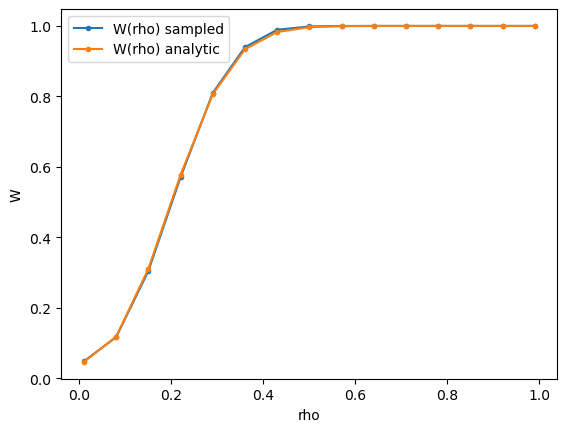

In [47]:
W = []
n = 100
rho_arr = np.arange(0.01,1.0,0.07) ; print(rho_arr)
num_samples = 10000
for rho in rho_arr :
    count_reject = []
    for j in range(num_samples) :
        sample = sample_gen(n)
        sample = get_corr_sample(sample , rho)
        count_reject.append(np.abs(T(sample)) > 20/n)
    W.append( sum(count_reject) / num_samples)
    # print(W[-1])
sigma = np.sqrt((1+rho_arr**2)/n) 
mean = rho_arr
analytic_W = 1- norm.cdf(20/n , loc=mean, scale= sigma) + norm.cdf(-20/n , loc=mean, scale= sigma)
plt.plot(rho_arr , W , '.-' ,label='W(rho) sampled')
plt.plot(rho_arr , analytic_W , '.-' ,label='W(rho) analytic')
plt.xlabel('rho')
plt.ylabel('W')
plt.legend()
plt.show()


### Сравним первую статистику с соотв. криетрием и вторую статистику с ее критерием

In [48]:
def T_2(X) :
    return np.sum((X[0]-X[1])**2)/len(X[0])/2
def get_W(n , criterion , num_samples ,rho_arr) :
    W = []
    for rho in rho_arr :
        count_reject = []
        for _ in range(num_samples) :
            sample = sample_gen(n)
            sample = get_corr_sample(sample , rho)
            count_reject.append(criterion(sample))
        W.append( sum(count_reject) / num_samples)
    return W
def crit_1(sample)  :
    return np.abs(T(sample)) > 20/n
def crit_2(sample) :
    return np.abs(T_2(sample)-1) > 1.96*np.sqrt(2)/np.sqrt(n)

### Как можем видеть , вторая статистика(критерий) хуже первой по мощности при фиксированном $\alpha$

[-1.   -0.94 -0.88 -0.82 -0.76 -0.7  -0.64 -0.58 -0.52 -0.46 -0.4  -0.34
 -0.28 -0.22 -0.16 -0.1  -0.04  0.02  0.08  0.14  0.2   0.26  0.32  0.38
  0.44  0.5   0.56  0.62  0.68  0.74  0.8   0.86  0.92  0.98]


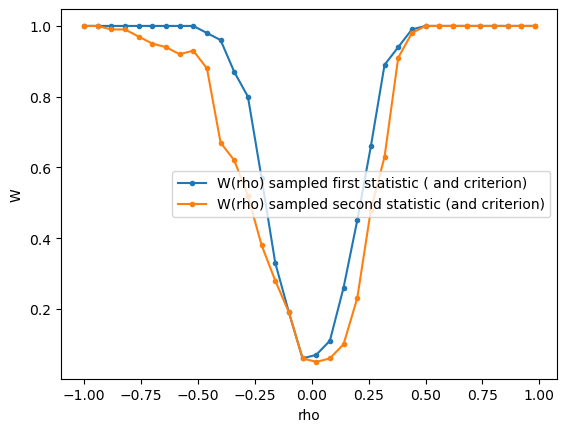

In [67]:
n = 100
rho_arr = np.arange(-1.0,1.0,0.06) ; print(rho_arr)
num_samples = 100
W1 = get_W(n , crit_1  ,num_samples ,rho_arr)
W2 = get_W(n , crit_2  , num_samples ,rho_arr)

plt.plot(rho_arr , W1, '.-' ,label='W(rho) sampled first statistic ( and criterion)')
plt.plot(rho_arr , W2 , '.-' ,label='W(rho) sampled second statistic (and criterion)')
plt.xlabel('rho')
plt.ylabel('W')
plt.legend()
plt.show()

#### Проверили что у второго критерия $\alpha $ < 0.05

In [21]:
get_W(n , crit_2  , 10000 ,[0.0])

[0.0475]